<a href="https://colab.research.google.com/github/kganesh1999/5292353_CAP5610_Assignment/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [451]:
#Import Libraries
import numpy as np
import pandas as pd
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt

In [452]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

#Train Data Preprocessing 

In [453]:
#Dropping unwanted features
titanic_train.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [454]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_train['Sex'])
titanic_train = pd.concat((bin,titanic_train),axis=1)
titanic_train.drop(['Sex','male'],axis=1,inplace=True)
titanic_train = titanic_train.rename(columns={"female":"Sex"})
titanic_train.head()

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C
2,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S
3,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S
4,0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S


In [455]:
#Filling missing values in Age feature 
mean=titanic_train['Age'].mean()
std=titanic_train['Age'].std()
titanic_train['Age'] = titanic_train['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_train['Age'].isna().sum()

0

In [456]:
#Filling missing values in Embarked feature
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)
titanic_train['Embarked'].isna().sum()

0

In [457]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= -1.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_train['Fare'] = titanic_train['Fare'].apply(mask)

In [458]:
#Banding Age group
def mask(age):
  if ((age >= 0) & (age <= 4)):
    return int(0)
  elif ((age > 4) & (age <= 15)):
    return int(1)
  elif ((age > 15) & (age <= 25)):
    return int(2)
  elif ((age > 25) & (age <= 40)):
    return int(3)
  elif ((age > 40) & (age <= 60)):
    return int(4)
  elif ((age > 60) & (age <= titanic_train['Age'].max())):
    return int(5)
titanic_train['Age'] = titanic_train['Age'].apply(mask)

In [459]:
#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_train = titanic_train.replace(encode_emb)

In [460]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_train['IsAlone'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train['IsAlone'] = titanic_train['IsAlone'].apply(boolean)

In [461]:
#Drop PassengerID and Name
titanic_train.drop(['PassengerId','Name'],axis=1,inplace=True)

In [462]:
titanic_train.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,0,3,2,1,0,0,1,0
1,1,1,1,3,1,0,3,2,0
2,1,1,3,3,0,0,1,1,1
3,1,1,1,3,1,0,3,1,0
4,0,0,3,3,0,0,1,1,1


In [463]:
titanic_train.isna().sum()

Sex         0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

# Test Data Preprocessing


In [464]:
#Dropping unwanted features
titanic_test.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [465]:
#Convert sex into binary variable (Male = 0 and Female =1)
bin = pd.get_dummies(titanic_test['Sex'])
titanic_test = pd.concat((bin,titanic_test),axis=1)
titanic_test.drop(['Sex','male'],axis=1,inplace=True)
titanic_test = titanic_test.rename(columns={"female":"Sex"})

In [466]:
#Filling missing values in Fare feature
titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0],inplace=True)
titanic_test['Fare'].isna().sum()

0

In [467]:
#Filling missing values in Age feature 
mean = titanic_test['Age'].mean()
std = titanic_test['Age'].std()
titanic_test['Age'] = titanic_test['Age'].fillna(value=np.random.randint(mean-std, mean+std))
titanic_test['Age'].isna().sum()

0

In [468]:
#Filling missing values in Embarked feature
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0],inplace=True)
titanic_test['Embarked'].isna().sum()

0

In [469]:
#Conversion of Numerical values in Fare column to ordinal values
def mask(data):
  if ((data >= 0.00) & (data <= 7.91)):
    return int(0)
  elif ((data > 7.91) & (data <= 14.454)):
    return int(1)
  elif ((data > 14.454) & (data <= 31.0)):
    return int(2)
  elif (data > 31.0):
    return int(3)
titanic_test['Fare'] = titanic_test['Fare'].apply(mask)

In [470]:
#Banding Age group
def mask(age):
  if ((age >= 0) & (age <= 4)):
    return int(0)
  elif ((age > 4) & (age <= 15)):
    return int(1)
  elif ((age > 15) & (age <= 25)):
    return int(2)
  elif ((age > 25) & (age <= 40)):
    return int(3)
  elif ((age > 40) & (age <= 60)):
    return int(4)
  elif ((age > 60) & (age <= titanic_test['Age'].max())):
    return int(5)
titanic_test['Age'] = titanic_test['Age'].apply(mask)

In [471]:
#Encoding Embarked values (S=1, C=2, Q=3)
encode_emb={'Embarked' : {"S":1,"C":2,"Q":3}}
titanic_test = titanic_test.replace(encode_emb)

In [472]:
#Create another feature 'IsAlone'
def boolean(data):
  if (data==0):
    return 1
  else:
    return 0
titanic_test['IsAlone'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test['IsAlone'] = titanic_test['IsAlone'].apply(boolean)

In [473]:
#Drop PassengerID and Name
titanic_test.drop(['PassengerId','Name'],axis=1,inplace=True)
titanic_test.head()

,Sex,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,3,0,0,0,3,1
1,1,3,4,1,0,0,1,0
2,0,2,5,0,0,1,3,1
3,0,3,3,0,0,1,1,1
4,1,3,2,1,1,1,1,0


In [474]:
titanic_test.isna().sum()

Sex         0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [475]:
titanic_train.corr()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,IsAlone
Sex,1.000000,0.543351,-0.131900,-0.075200,0.114631,0.245489,0.248940,0.116569,-0.303646
Survived,0.543351,1.000000,-0.338481,-0.061531,-0.035322,0.081629,0.295875,0.106811,-0.203367
Pclass,-0.131900,-0.338481,1.000000,-0.320453,0.083081,0.018443,-0.628459,0.045702,0.135207
Age,-0.075200,-0.061531,-0.320453,1.000000,-0.263855,-0.189294,0.068248,-0.092988,0.175746
SibSp,0.114631,-0.035322,0.083081,-0.263855,1.000000,0.414838,0.394248,-0.059961,-0.584471
Parch,0.245489,0.081629,0.018443,-0.189294,0.414838,1.000000,0.393048,-0.078665,-0.583398
Fare,0.248940,0.295875,-0.628459,0.068248,0.394248,0.393048,1.000000,-0.091096,-0.568942
Embarked,0.116569,0.106811,0.045702,-0.092988,-0.059961,-0.078665,-0.091096,1.000000,0.017807
IsAlone,-0.303646,-0.203367,0.135207,0.175746,-0.584471,-0.583398,-0.568942,0.017807,1.000000


#Data spliting (Train and test)

In [476]:
x_train = titanic_train[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values
y_train = titanic_train['Survived'].values
x_test = titanic_test[['Sex','Pclass','Age','SibSp','Parch','Fare','Embarked','IsAlone']].values

In [477]:
x_train

array([[0, 3, 2, ..., 0, 1, 0],
       [1, 1, 3, ..., 3, 2, 0],
       [1, 3, 3, ..., 1, 1, 1],
       ...,
       [1, 3, 2, ..., 2, 1, 0],
       [0, 1, 3, ..., 2, 2, 1],
       [0, 3, 3, ..., 0, 3, 1]])

In [478]:
x_test

array([[0, 3, 3, ..., 0, 3, 1],
       [1, 3, 4, ..., 0, 1, 0],
       [0, 2, 5, ..., 1, 3, 1],
       ...,
       [0, 3, 3, ..., 0, 1, 1],
       [0, 3, 4, ..., 1, 1, 1],
       [0, 3, 4, ..., 2, 2, 0]])

#Data Normalization

In [479]:
from sklearn.preprocessing import Normalizer
n = Normalizer()

In [480]:
#Normalize train data
x_train_norm = n.fit_transform(x_train)
x_train_norm

array([[0.        , 0.77459667, 0.51639778, ..., 0.        , 0.25819889,
        0.        ],
       [0.2       , 0.2       , 0.6       , ..., 0.6       , 0.4       ,
        0.        ],
       [0.21320072, 0.63960215, 0.63960215, ..., 0.21320072, 0.21320072,
        0.21320072],
       ...,
       [0.20412415, 0.61237244, 0.40824829, ..., 0.40824829, 0.20412415,
        0.        ],
       [0.        , 0.22941573, 0.6882472 , ..., 0.45883147, 0.45883147,
        0.22941573],
       [0.        , 0.56694671, 0.56694671, ..., 0.        , 0.56694671,
        0.18898224]])

In [481]:
#Normalize test data
x_test_norm = n.fit_transform(x_test)
x_test_norm

array([[0.        , 0.56694671, 0.56694671, ..., 0.        , 0.56694671,
        0.18898224],
       [0.18898224, 0.56694671, 0.75592895, ..., 0.        , 0.18898224,
        0.        ],
       [0.        , 0.31622777, 0.79056942, ..., 0.15811388, 0.47434165,
        0.15811388],
       ...,
       [0.        , 0.67082039, 0.67082039, ..., 0.        , 0.2236068 ,
        0.2236068 ],
       [0.        , 0.56694671, 0.75592895, ..., 0.18898224, 0.18898224,
        0.18898224],
       [0.        , 0.50709255, 0.6761234 , ..., 0.3380617 , 0.3380617 ,
        0.        ]])

# Decision Tree Classifier

In [482]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state = 0)
dtc.fit(x_train_norm,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [483]:
#With cross-validation
dtc_cv = cross_val_score(dtc, x_train_norm, y_train, cv=5)
dtc_cv.mean()

0.8114493754315486

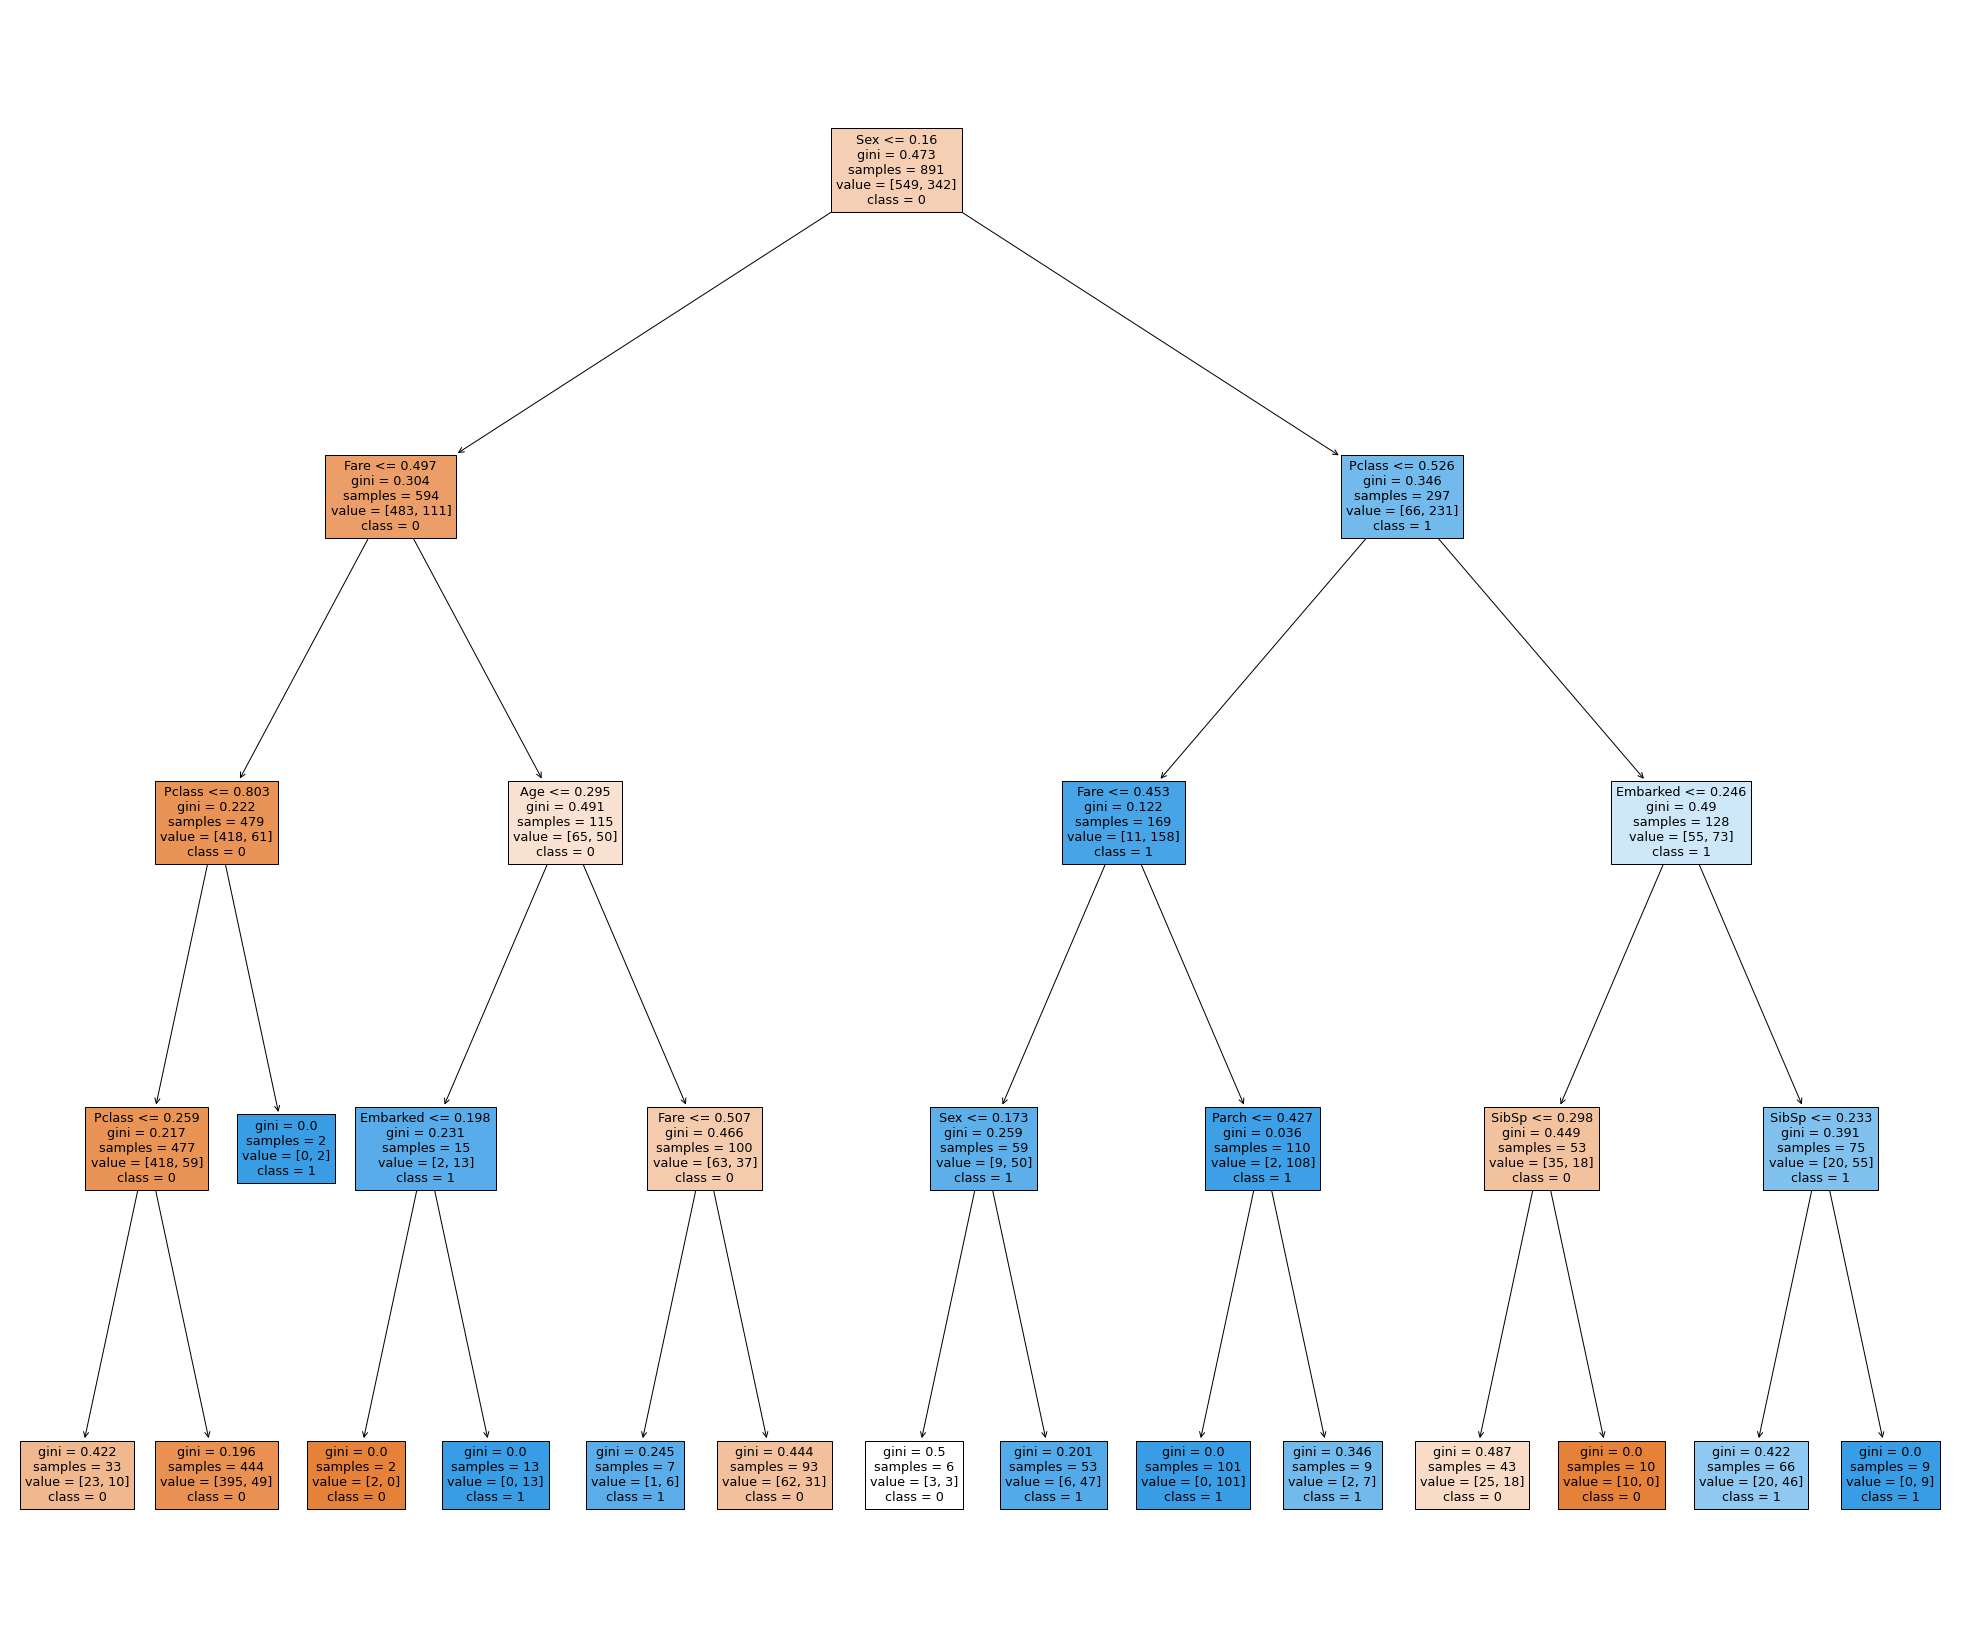

In [484]:
fig = plt.figure(figsize=(35,30))
dtree = tree.plot_tree(dtc, feature_names=titanic_train.columns[[0,2,3,4,5,6,7,8]], 
                       class_names=list(map(lambda x: str(x), dtc.classes_)), filled=True)

# Random Forest Classifier

In [485]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100, criterion='gini', max_depth=7, random_state = 0)
rfc_cv = cross_val_score(rfc, x_train_norm, y_train, cv=5)
rfc_cv.mean()

0.819327098110602